 <img src="https://www.nvidia.com/content/dam/en-zz/Solutions/about-nvidia/logo-and-brand/01-nvidia-logo-horiz-500x200-2c50-d@2x.png" width=300>
 
# 계산과학공학회 인공지능 겨울학교 2022
# [KSCSE](http://www.cse.or.kr/) 2022  GPU Tutorial  @ High1
# Day1 - Introducion to AI 
by Hyungon Ryu | NVAITC(NVIDIA AI Tech. Center)  Korea 


![](http://www.cse.or.kr/assets/img/logo_cse.png)

# Part I - Linear Regression

 

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_ols_001.png)

Scikit-learn (Sklearn) is  Simple and efficient tools for predictive data analysis tool to provide a set of efficient tools for statistical modeling and machine learning, like classification, regression, clustering, and dimensionality reduction. NumPy, SciPy, and Matplotlib are the foundations of this package, primarily written in Python.

`from sklearn.linear_model import LinearRegression`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Diabetes dataset
original dataset [](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt) 
- number of observation : 442
- X , 10 variables
  - age, age  in years
  - sex
  - bmi,  body mass index
  - bp, average blood pressure
  - s1 tc,  total serum cholesterol
  - s2 ldl, low-density lipoproteins
  - s3 hdl, high-density lipoproteins
  - s4 tch, total cholesterol / HDL
  - s5 ltg, possibly log of serum triglycerides level
  - s6 glu, blood sugar level

- Y, quantitative measure of disease progression one year after baseline


### understand dataset
scikit learn have preprocessed(normalized) diabetes dataset in bundle.

In [ ]:
# Load the diabetes dataset
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [ ]:
print(diabetes_X.shape)
print(diabetes_y.shape)
print(diabetes_X[0],diabetes_y[0] )

(442, 10)
(442,)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613] 151.0


### select variables and split train/test datasets

In [ ]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2] # 2 for BMI 

In [ ]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-40]
diabetes_X_test = diabetes_X[-40:]

In [ ]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-40]
diabetes_y_test = diabetes_y[-40:]

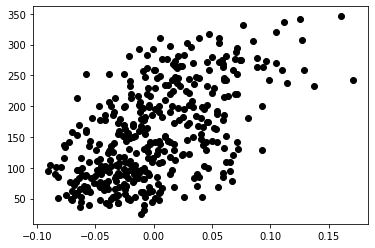

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")

## regression with ols
LinearRegression fits a linear model with coefficients `w = (w1, …, wp)` to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. documents : [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [ ]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

### draw regression line

Coefficients: 
 [955.44001079]
Mean squared error: 3309.16
Coefficient of determination: 0.42


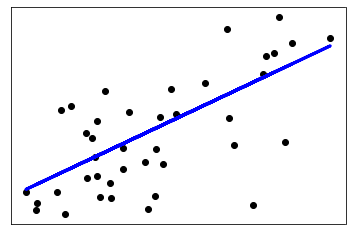

In [ ]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

##  model with Keras MLP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### diabetes dataset

From Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499, we have

"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

In the tab delimited file above, the variables are named

`AGE SEX BMI BP S1 S2 S3 S4 S5 S6 Y`
whereas, in the R file, they are named

`age sex bmi map tc ldl hdl tch ltg glu y`

[link](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

### load data with pandas dataframe library

In [ ]:
df = pd.read_csv('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt', sep='\t')
print(df.head())

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135


### visualize multivariates with sns pairplot

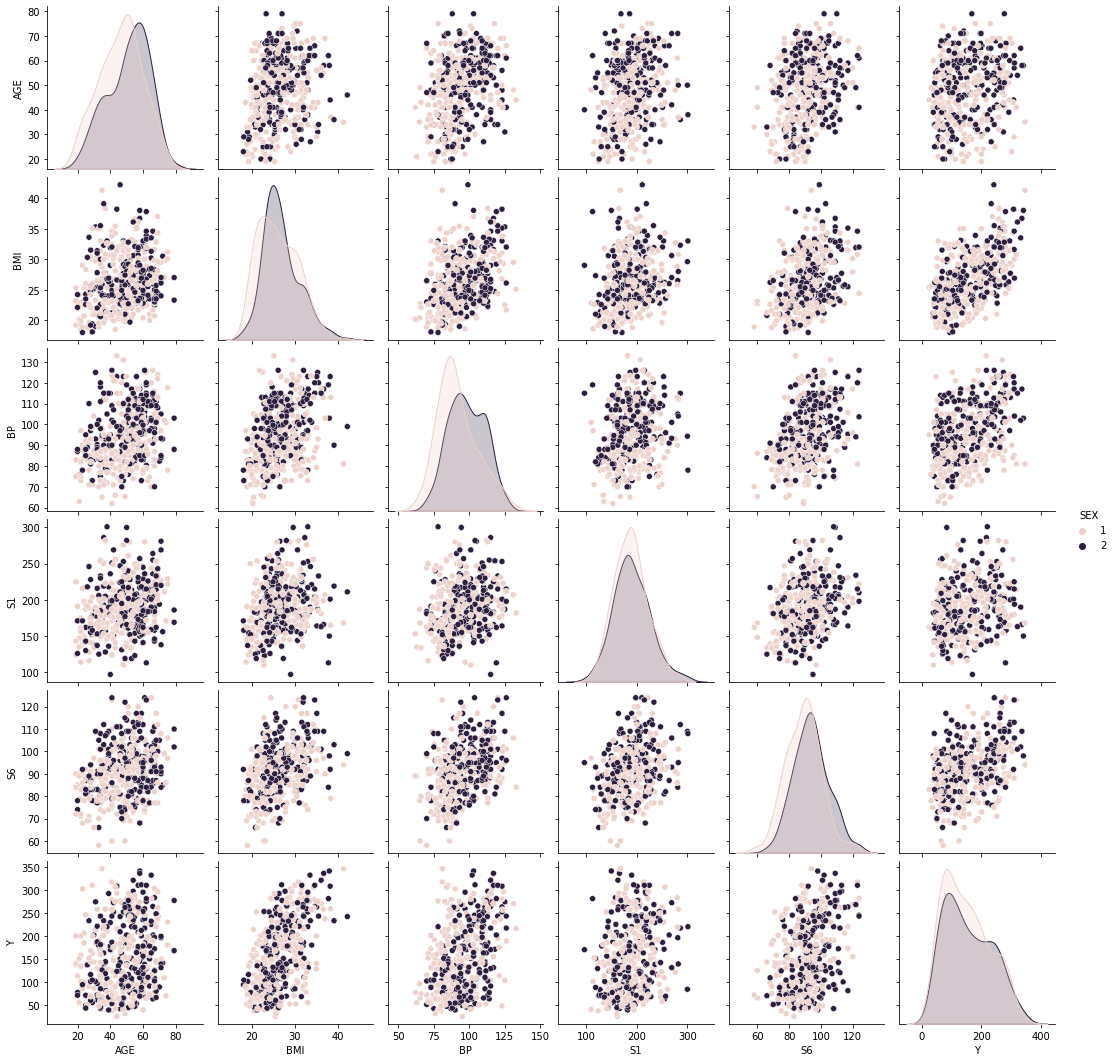

In [ ]:
sns.pairplot(df[["AGE", 'SEX' , "BMI", "BP", "S1", "S6", "Y"]] , hue='SEX')

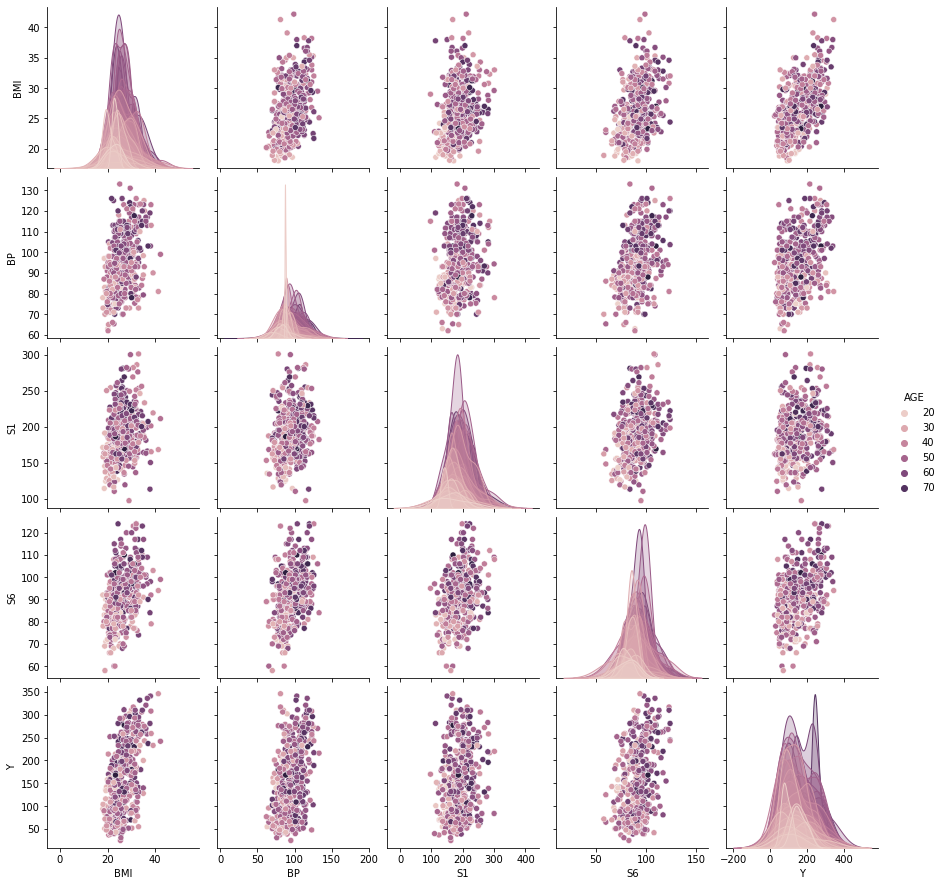

In [ ]:
sns.pairplot(df[["AGE",  "BMI", "BP", "S1", "S6", "Y"]] , hue='AGE')

In [ ]:
df_train = df.sample(frac=0.8,random_state=0)
df_test = df.drop(df_train.index)

In [ ]:
train_stats = df_train.describe()
train_stats.pop("Y")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
AGE,354.0,48.324859,12.980443,19.0000,38.2500,50.00000,58.750000,79.000
SEX,354.0,1.454802,0.498658,1.0000,1.0000,1.00000,2.000000,2.000
BMI,354.0,26.512994,4.430777,18.0000,23.2250,25.80000,29.575000,42.200
BP,354.0,94.579068,13.728629,62.0000,84.0000,93.00000,105.000000,133.000
S1,354.0,188.658192,34.787076,97.0000,164.0000,186.00000,208.750000,301.000
S2,354.0,115.360169,31.072782,41.6000,95.5500,110.70000,135.200000,242.400
S3,354.0,50.038136,13.136970,23.0000,41.0000,48.00000,57.000000,99.000
S4,354.0,4.029209,1.261144,2.0000,3.0000,4.00000,5.000000,9.090
S5,354.0,4.621101,0.508280,3.2581,4.2767,4.59005,4.981875,6.107
S6,354.0,91.593220,11.148676,60.0000,84.0000,91.00000,98.000000,124.000


In [ ]:
train_labels = df_train.pop('Y')
test_labels = df_test.pop('Y')

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [ ]:
df_train_normalized = norm(df_train)
df_test_normalized = norm(df_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## simple MLP model

# Building a Neuron

Neurons are the fundamental building blocks to a neural network. Just like how biological neurons send an electrical impulse under specific stimuli, artificial neural networks similarly result in a numerical output with a given numerical input.

We can break down building a neuron into 3 steps:

 - Defining the architecture
 - Intiating training ( compile)
 - Evaluating the model

![](https://camo.githubusercontent.com/b1cabba25cf7982d07a2a8ad60f344a0a69b463a75896d03c0e05ee02253a3bc/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f7468756d622f312f31302f426c617573656e5f303635375f4d756c7469706f6c61724e6575726f6e2e706e672f35313270782d426c617573656e5f303635375f4d756c7469706f6c61724e6575726f6e2e706e67)

Image courtesy of Wikimedia Commons

Biological neurons transmit information with a mechanism similar to Morse Code. It receives electrical signals through the dendrites, and under the right conditions, sends an electrical impulse down the axon and out through the terminals.

It is theorized the sequence and timing of these impulses play a large part of how information travels through the brain. Most artificial neural networks have yet to capture this timing aspect of biological neurons, and instead emulate the phenomenon with simpler mathematical formulas.

# The Math
Computers are built with discrete 0s and 1s whereas humans and animals are built on more continuous building blocks. Because of this, some of the first neurons attempted to mimic biological neurons with a linear regression function: $y = mx + b$. The $x$ is like information coming in through the dendrites and the $y$ is like the output through the terminals. As the computer guesses more and more answers to the questions we present it, it will update its variables ($m$ and $b$) to better fit the line to the data it has seen.

Neurons are often exposed to multivariate data. We're going to build a neuron that takes each  value ( float), and assign it a weight, which is equivalent to our m. Data scientists often express this weight as w. For example, the first variable will have a weight of `w0`, the second will have a weight of `w1`, and so on. Our full equation becomes `y = w0x0 + w1x1 + w2x2 + ... + b`. 

Each observatio have 10 variables, so we will have a total of 10 weights. All values of variables are normalized.  Each number below will be assigned a weight.

#### Defining our model

Our model has three layers:

 - 10 input features (10 variables)
 - 512 nodes in the hidden layer (feel free to experiment with this value) 
 - 1 output nodes to denote the class

We assume the input is 1d array. the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 512 nodes (or neurons). The second (and last) layer is a 1-node dense layer that returns an float variable to regresstion. 



In [ ]:
model = keras.Sequential([
layers.Input( shape=[len(df_train.keys())]   ) ,
layers.Dense(512, activation='relu'), 
layers.Dense(1) # regression
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5632      
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 6,145
Trainable params: 6,145
Non-trainable params: 0
_________________________________________________________________


### compile the model


Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

 - <B>Loss function</B> —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction. See KERAS's [loss functions](https://keras.io/api/losses/) section
 - <B>Optimizer</B> —This is how the model is updated based on the data it sees and its loss function. See Keras [Optimizer](https://keras.io/api/optimizers/) Section
 - <B>Metrics</B> —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified. See Keras's [Metrics](https://keras.io/api/metrics/) section

In [ ]:
model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])

### prepare callback function for log

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 50 == 0: print(epoch, logs)
    print('.', end='')


### train the model 
Training the neural network model requires the following steps:

 1. Feed the training data to the model. In this example, the training data is in the `df_train_normalized`  and `train_labels` arrays.
 2. The model learns to associate multi variables and output.
 3. You ask the model to make predictions about a test set—in this example, the   `df_test_normalized` array. Verify that the predictions match the labels from the `test_labels` array.
 To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [ ]:
hist = model.fit(
  df_train_normalized, train_labels,
  epochs=500, validation_split = 0.2, verbose=0  ,
  callbacks=[PrintDot()] )

0 {'loss': 29030.986328125, 'mae': 152.9325408935547, 'mse': 29030.986328125, 'val_loss': 26644.1171875, 'val_mae': 143.9446258544922, 'val_mse': 26644.1171875}
..................................................50 {'loss': 4023.0556640625, 'mae': 50.53485107421875, 'mse': 4023.0556640625, 'val_loss': 5947.640625, 'val_mae': 59.981292724609375, 'val_mse': 5947.640625}
..................................................100 {'loss': 2868.60205078125, 'mae': 43.5502815246582, 'mse': 2868.60205078125, 'val_loss': 3984.79541015625, 'val_mae': 48.10965347290039, 'val_mse': 3984.79541015625}
..................................................150 {'loss': 2603.17822265625, 'mae': 41.596492767333984, 'mse': 2603.17822265625, 'val_loss': 3536.37451171875, 'val_mae': 45.53014373779297, 'val_mse': 3536.37451171875}
..................................................200 {'loss': 2465.20947265625, 'mae': 40.357505798339844, 'mse': 2465.20947265625, 'val_loss': 3477.14013671875, 'val_mae': 44.95809555053

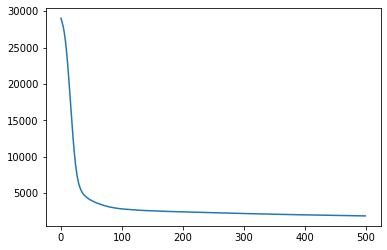

In [ ]:
plt.plot(hist.history['loss']) 

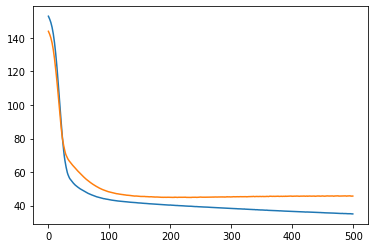

In [ ]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.show()

In [ ]:
df_test_predictions = model.predict(df_test_normalized).flatten()

3/3 [==============================] - 0s 3ms/step


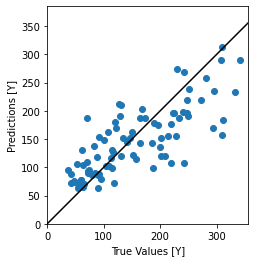

In [ ]:
plt.scatter(test_labels, df_test_predictions)
plt.xlabel('True Values [Y]')
plt.ylabel('Predictions [Y]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-400, 400], [-400, 400], color='black')

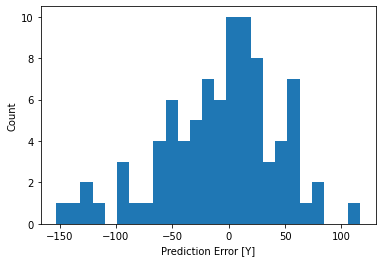

In [ ]:
error = df_test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Y]")
_ = plt.ylabel("Count")

### result

model is not good. 

## one hot encoding for sex 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df = pd.read_csv('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt', sep='\t')
print(df.head())

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135


In [ ]:
df_train = df.sample(frac=0.8,random_state=0)
df_test = df.drop(df_train.index)

In [ ]:
df_train = pd.get_dummies(df_train,  columns=['SEX'], prefix='SEX')
df_test = pd.get_dummies(df_test,  columns=['SEX'], prefix='SEX')

In [ ]:
train_stats = df_train.describe()
train_stats.pop("Y")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
AGE,354.0,48.324859,12.980443,19.0000,38.2500,50.00000,58.750000,79.000
BMI,354.0,26.512994,4.430777,18.0000,23.2250,25.80000,29.575000,42.200
BP,354.0,94.579068,13.728629,62.0000,84.0000,93.00000,105.000000,133.000
S1,354.0,188.658192,34.787076,97.0000,164.0000,186.00000,208.750000,301.000
S2,354.0,115.360169,31.072782,41.6000,95.5500,110.70000,135.200000,242.400
S3,354.0,50.038136,13.136970,23.0000,41.0000,48.00000,57.000000,99.000
S4,354.0,4.029209,1.261144,2.0000,3.0000,4.00000,5.000000,9.090
S5,354.0,4.621101,0.508280,3.2581,4.2767,4.59005,4.981875,6.107
S6,354.0,91.593220,11.148676,60.0000,84.0000,91.00000,98.000000,124.000
SEX_1,354.0,0.545198,0.498658,0.0000,0.0000,1.00000,1.000000,1.000


In [ ]:
train_labels = df_train.pop('Y')
test_labels = df_test.pop('Y')

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [ ]:
df_train_normalized = norm(df_train)
df_test_normalized = norm(df_test)

In [ ]:
model = keras.Sequential([
layers.Input( shape=[len(df_train.keys())]   ) ,
layers.Dense(512, activation='relu'), 
layers.Dense(512, activation='relu'), 
layers.Dense(512, activation='relu'), 
layers.Dense(1) # regression
])


In [ ]:
model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 50 == 0: print(epoch, logs)
    print('.', end='')

In [ ]:
hist = model.fit(
  df_train_normalized, train_labels,
  epochs=500, validation_split = 0.2, verbose=0  ,
  callbacks=[PrintDot()] )

0 {'loss': 27702.205078125, 'mae': 148.5504150390625, 'mse': 27702.205078125, 'val_loss': 21792.986328125, 'val_mae': 125.49649047851562, 'val_mse': 21792.986328125}
..................................................50 {'loss': 1814.9742431640625, 'mae': 34.43001937866211, 'mse': 1814.9742431640625, 'val_loss': 3714.49072265625, 'val_mae': 47.11006164550781, 'val_mse': 3714.49072265625}
..................................................100 {'loss': 390.0558776855469, 'mae': 14.720230102539062, 'mse': 390.0558776855469, 'val_loss': 5077.45068359375, 'val_mae': 53.48799514770508, 'val_mse': 5077.45068359375}
..................................................150 {'loss': 129.17117309570312, 'mae': 8.145373344421387, 'mse': 129.17117309570312, 'val_loss': 5913.7041015625, 'val_mae': 57.63092803955078, 'val_mse': 5913.7041015625}
..................................................200 {'loss': 80.33423614501953, 'mae': 6.736481666564941, 'mse': 80.33423614501953, 'val_loss': 5638.04296875, 'v

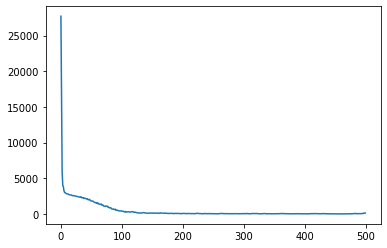

In [ ]:
plt.plot(hist.history['loss']) 

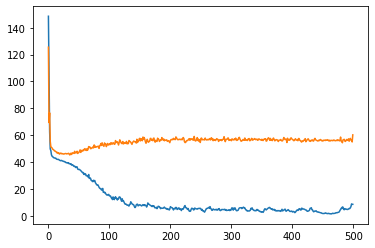

In [ ]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.show()

In [ ]:
df_test_predictions = model.predict(df_test_normalized).flatten()

3/3 [==============================] - 0s 3ms/step


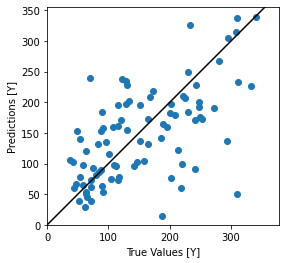

In [ ]:
plt.scatter(test_labels, df_test_predictions)
plt.xlabel('True Values [Y]')
plt.ylabel('Predictions [Y]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-400, 400], [-400, 400], color='black')

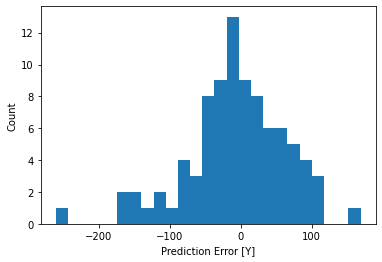

In [ ]:
error = df_test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Y]")
_ = plt.ylabel("Count")

In [ ]:
df_train = pd.get_dummies(df_train,  columns=['SEX'], prefix='SEX')
df_test = pd.get_dummies(df_test,  columns=['SEX'], prefix='SEX')

In [ ]:
print(df_train_normalized.shape, df_test_normalized.shape)

(354, 11) (88, 11)


In [ ]:
num_samples = df_train_normalized.shape[0]
num_variables = df_train_normalized.shape[1]
num_dim = 1 


# XGboost 

In [ ]:
import xgboost as xgb

In [ ]:
xg_reg = xgb.XGBRegressor()

In [ ]:
xg_reg.fit(df_train_normalized, train_labels)

[11:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
preds = xg_reg.predict(df_test_normalized)

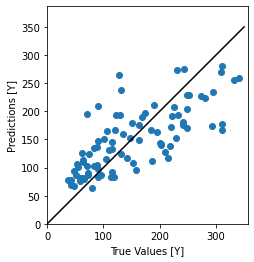

In [ ]:
 plt.scatter(test_labels , preds )
plt.xlabel('True Values [Y]')
plt.ylabel('Predictions [Y]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-350, 350], [-350, 350], color='black')

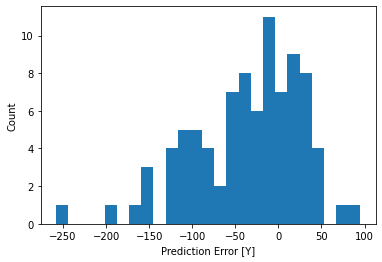

In [ ]:
error = np.array(df_test_normalized_reshaped_pred) - np.array(test_labels)
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Y]")
_ = plt.ylabel("Count")

# reshape for conv 1d 

In [ ]:
num_samples = df_train_normalized.shape[0]
num_variables = df_train_normalized.shape[1]
num_dim = 1 
df_train_normalized_reshaped = np.array(df_train_normalized).reshape(num_samples,num_variables,num_dim)



In [ ]:
num_samples = df_test_normalized.shape[0]
num_variables = df_test_normalized.shape[1]
num_dim = 1 

df_test_normalized_reshaped = np.array(df_test_normalized).reshape(num_samples,num_variables,num_dim)

In [ ]:
print(df_train_normalized_reshaped.shape, df_test_normalized_reshaped.shape)

(354, 11, 1) (88, 11, 1)


In [ ]:
model = keras.Sequential([
layers.Input( shape= (num_variables,num_dim )   ) ,
layers.Conv1D(filters=128, kernel_size=3, activation='relu', name="Conv1D_1"),
#layers.MaxPooling1D(pool_size=2, name="MaxPooling1D_1"),
layers.Dropout(0.2),
layers.Conv1D(filters=128, kernel_size=3, activation='relu', name="Conv1D_2"),
#layers.MaxPooling1D(pool_size=2, name="MaxPooling1D_2"),
layers.Dropout(0.2),
layers.Flatten(),
layers.Dense(512, activation='relu'),
layers.Dropout(0.2),
layers.Dense(512, activation='relu'),
layers.Dropout(0.2),
layers.Dense(128, activation='relu'),
layers.Dense(1)
])


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 9, 128)            512       
                                                                 
 dropout_8 (Dropout)         (None, 9, 128)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 7, 128)            49280     
                                                                 
 dropout_9 (Dropout)         (None, 7, 128)            0         
                                                                 
 flatten_2 (Flatten)         (None, 896)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               459264    
                                                                 
 dropout_10 (Dropout)        (None, 512)              

In [ ]:
model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 50 == 0: print(epoch, logs)
    print('.', end='')

In [ ]:
hist = model.fit(
  df_train_normalized_reshaped, train_labels,
  epochs=500, validation_split = 0.2, verbose=0  ,
  callbacks=[PrintDot()] )

0 {'loss': 25476.455078125, 'mae': 139.78074645996094, 'mse': 25476.455078125, 'val_loss': 10494.3798828125, 'val_mae': 80.74774169921875, 'val_mse': 10494.3798828125}
..................................................50 {'loss': 2185.575927734375, 'mae': 37.6319580078125, 'mse': 2185.575927734375, 'val_loss': 3718.34033203125, 'val_mae': 47.98305892944336, 'val_mse': 3718.34033203125}
..................................................100 {'loss': 1515.6024169921875, 'mae': 31.298946380615234, 'mse': 1515.6024169921875, 'val_loss': 4443.369140625, 'val_mae': 51.449520111083984, 'val_mse': 4443.369140625}
..................................................150 {'loss': 808.9990844726562, 'mae': 23.215457916259766, 'mse': 808.9990844726562, 'val_loss': 4423.4189453125, 'val_mae': 52.07730484008789, 'val_mse': 4423.4189453125}
..................................................200 {'loss': 630.9734497070312, 'mae': 19.467491149902344, 'mse': 630.9734497070312, 'val_loss': 4836.6884765625, 'v

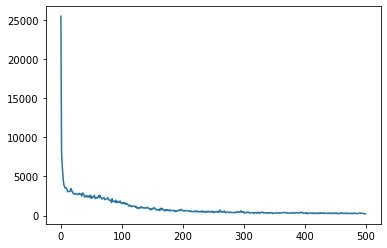

In [ ]:
plt.plot(hist.history['loss']) 

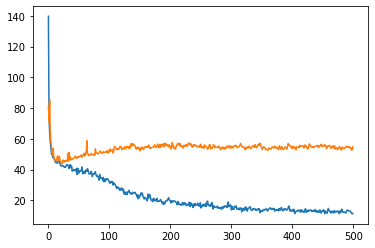

In [ ]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.show()

In [ ]:
df_test_normalized_reshaped_pred = model.predict(df_test_normalized_reshaped).flatten() 


3/3 [==============================] - 0s 30ms/step


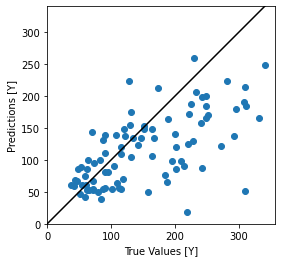

In [ ]:
plt.scatter(test_labels , df_test_normalized_reshaped_pred )
plt.xlabel('True Values [Y]')
plt.ylabel('Predictions [Y]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-400, 400], [-400, 400], color='black')

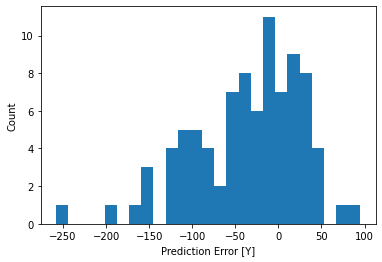

In [ ]:
error = np.array(df_test_normalized_reshaped_pred) - np.array(test_labels)
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Y]")
_ = plt.ylabel("Count")

# Part 2 -  CNN Primer and Keras  


<br>
In this notebook you will be introduced to the concept of a convolutional neural network (CNN) and implement one using Keras. This notebook is designed as a starting point for absolute beginners to deep learning.

In this notebook you will be introduced to the concept of a convolutional neural network (CNN) and implement one using Keras. This notebook is designed as a starting point for absolute beginners to deep learning.

### Contents of this notebook:

 - How a deep learning project is planned
 - Wrapping things up with an example (classification)
  - Fully connected networks

### By the end of this notebook the participant will:

 - Understand machine learning pipelines
 - Write a deep learning classifier and train it


## Machine Learning Pipeline
During the bootcamp we will be making use of the following concepts to help us understand how a machine learning (ML) project should be planned and executed:

 1. <B>Data</B>: To start any ML project we need data which is pre-processed and can be fed into the network.
 2. <B>Task</B>: There are many possible tasks in the field of ML; we need to make sure we understand and define the problem statement accurately.
 3. <B>Model</B>: We need to build our model, which is neither too deep (requiring a lot of computational power) nor too small (preventing it from learning the important features).
 4. <B>Loss</B>: Out of the many loss functions that can be defined, we need to carefully choose one which is suitable for the task we are about to carry out.
 5. <B>Learning</B>: There are a variety of optimisers, each with their advantages and disadvantages. We must choose one which is suitable for our task and train our model using some suitably chosen hyperparameters.
 6. <B>Evaluation</B>: We must determine if our model has learned the features properly by analysing how it performs on data it has not previously seen.

### Step by Step  DL training 

#### load keras module

In [ ]:
# Import Necessary Libraries

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


#### prepare MNIST dataset

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![](https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png)

Loading the dataset returns four NumPy arrays:

The `x_train` and `y_train` arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the `x_test`, and `y_test` arrays.

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

#### Understanding the Data

In [ ]:
# Print array size of training dataset
print("Size of Training Images: " + str(x_train.shape))
# Print array size of labels
print("Size of Training Labels: " + str(y_train.shape))

# Let's see how our outputs look
print("Training Set Labels: " + str(y_train))


Size of Training Images: (60000, 28, 28)
Size of Training Labels: (60000,)
Training Set Labels: [5 0 4 ... 5 6 8]


In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

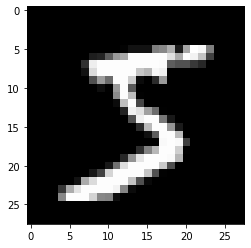

In [ ]:
import matplotlib.pyplot as plt
image = x_train[0]
plt.imshow(image, cmap='gray')

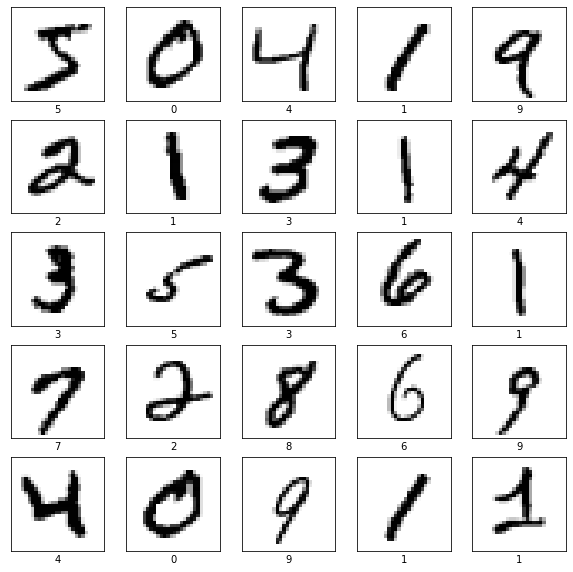

In [ ]:
# Let's print to verify whether the data is of the correct format.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

#### Data Preprocessing
 1d input
 for simplicity, flatting the 2D input to 1D array with `reshape` function

In [ ]:
x_train = x_train.reshape(60000, 784) # 28x28 = 784
x_valid = x_valid.reshape(10000, 784)

In [ ]:
print(x_train.shape)

(60000, 784)


The image pixel values range from 0 to 255. Let us now normalise the data range from 0 - 255 to 0 - 1 in both the Train and Test set. This normalisation of pixels helps us by optimizing the process where the gradients are computed.

In [ ]:
x_train = x_train / 255
x_valid = x_valid / 255 

In [ ]:
import tensorflow.keras as keras
num_categories = 10

#y_train = keras.utils.to_categorical(y_train, num_categories)
#y_valid = keras.utils.to_categorical(y_valid, num_categories)

# Building a Neuron

Neurons are the fundamental building blocks to a neural network. Just like how biological neurons send an electrical impulse under specific stimuli, artificial neural networks similarly result in a numerical output with a given numerical input.

We can break down building a neuron into 3 steps:

 - Defining the architecture
 - Intiating training ( compile)
 - Evaluating the model

![](https://camo.githubusercontent.com/b1cabba25cf7982d07a2a8ad60f344a0a69b463a75896d03c0e05ee02253a3bc/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f7468756d622f312f31302f426c617573656e5f303635375f4d756c7469706f6c61724e6575726f6e2e706e672f35313270782d426c617573656e5f303635375f4d756c7469706f6c61724e6575726f6e2e706e67)

Image courtesy of Wikimedia Commons

Biological neurons transmit information with a mechanism similar to Morse Code. It receives electrical signals through the dendrites, and under the right conditions, sends an electrical impulse down the axon and out through the terminals.

It is theorized the sequence and timing of these impulses play a large part of how information travels through the brain. Most artificial neural networks have yet to capture this timing aspect of biological neurons, and instead emulate the phenomenon with simpler mathematical formulas.

# The Math
Computers are built with discrete 0s and 1s whereas humans and animals are built on more continuous building blocks. Because of this, some of the first neurons attempted to mimic biological neurons with a linear regression function: $y = mx + b$. The $x$ is like information coming in through the dendrites and the $y$ is like the output through the terminals. As the computer guesses more and more answers to the questions we present it, it will update its variables ($m$ and $b$) to better fit the line to the data it has seen.

Neurons are often exposed to multivariate data. We're going to build a neuron that takes each pixel value (which is between `0` and `255`), and assign it a weight, which is equivalent to our m. Data scientists often express this weight as w. For example, the first pixel will have a weight of `w0`, the second will have a weight of `w1`, and so on. Our full equation becomes `y = w0x0 + w1x1 + w2x2 + ... + b`. 

Each image is 28 pixels by 28 pixels, so we will have a total of 784 weights. A pixel value of `0` would be black and a pixel value of `255` would be white. Let's look at the raw pixel values of the previous image we plotted. Each number below will be assigned a weight.

#### Defining our model

Our model has three layers:

 - 784 input features (28 * 28)
 - 512 nodes in the hidden layer (feel free to experiment with this value)
 - 512 nodes in the hidden layer (feel free to experiment with this value)
 - 10 output nodes to denote the class

We assume the input is 1d array. the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(units = 512, activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
Total params: 664,576
Trainable params: 664,576
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(units = 10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


#### Compile the model


Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

 - <B>Loss function</B> —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction. See KERAS's [loss functions](https://keras.io/api/losses/) section
 - <B>Optimizer</B> —This is how the model is updated based on the data it sees and its loss function. See Keras [Optimizer](https://keras.io/api/optimizers/) Section
 - <B>Metrics</B> —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified. See Keras's [Metrics](https://keras.io/api/metrics/) section

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In this case, we're going to use a type of function specific to classification called SparseCategoricalCrossentropy:

 - Sparse - for this function, it refers to how our label is an integer index for our categories
 - Categorical - this function was made for classification
 - Cross-entropy - the more confident our model is when it makes an incorrect guess, the worse its score will be. If a model is 100% confident when it is wrong, it will have a score of negative infinity!
from_logits - the linear output will be transformed into a probability which can be interpreted as the model's confidence that a particular category is the correct one for the given input.

#### train the model

Training the neural network model requires the following steps:

 1. Feed the training data to the model. In this example, the training data is in the `x_train`  and `y_train` arrays.
 2. The model learns to associate images and labels.
 3. You ask the model to make predictions about a test set—in this example, the   `x_test` array. Verify that the predictions match the labels from the `y_test` array.
 To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [ ]:
hist = model.fit(
    x_train, y_train, epochs=5, verbose=1
)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1863 - accuracy: 0.9424
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0813 - accuracy: 0.9748
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0557 - accuracy: 0.9822
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0415 - accuracy: 0.9868
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0360 - accuracy: 0.9884


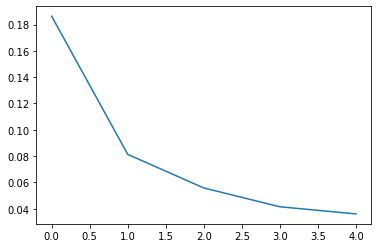

In [ ]:
plt.plot(hist.history['loss'])

#### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(x_valid,  y_valid, verbose=2)

313/313 - 1s - loss: 0.0732 - accuracy: 0.9814 - 680ms/epoch - 2ms/step


We get an accuracy of 97% on the test dataset, which is less than the 98.9% we got during the training phase. This problem in machine learning is called overfitting.

In [ ]:
# Making predictions from the test_images

predictions = model.predict(x_valid)

313/313 [==============================] - 0s 1ms/step


In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h)
x_valid = x_valid.reshape(x_valid.shape[0], w, h)


# Helper functions to plot images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

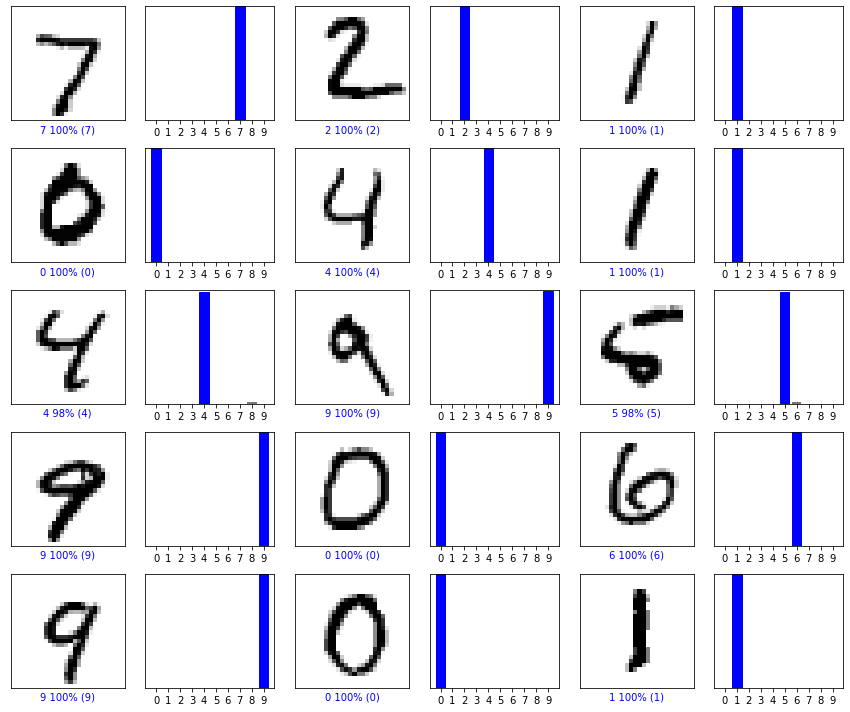

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_valid, x_valid)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_valid)
plt.tight_layout()
plt.show()

## one hot encoding

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In [ ]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [ ]:
x_train = x_train / 255
x_valid = x_valid / 255 

In [ ]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid_org = y_valid
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(
    x_train, y_train, epochs=5, verbose=1
)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1811 - accuracy: 0.9448
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0792 - accuracy: 0.9759
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0562 - accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0417 - accuracy: 0.9869
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0367 - accuracy: 0.9880


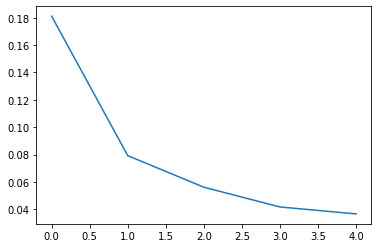

In [ ]:
plt.plot(hist.history['loss'])

In [ ]:
test_loss, test_acc = model.evaluate(x_valid,  y_valid, verbose=2)

313/313 - 1s - loss: 0.0756 - accuracy: 0.9812 - 960ms/epoch - 3ms/step


In [ ]:
# Making predictions from the test_images

predictions = model.predict(x_valid)

313/313 [==============================] - 1s 3ms/step


In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h)
x_valid = x_valid.reshape(x_valid.shape[0], w, h)


# Helper functions to plot images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

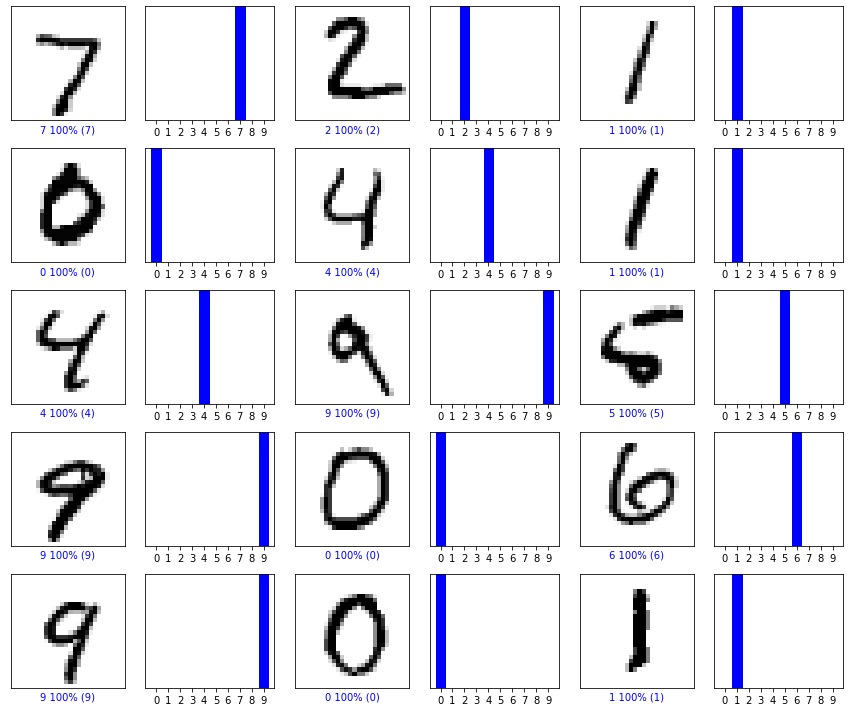

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_valid_org, x_valid) ## no one hot encoding for viz
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_valid_org)
plt.tight_layout()
plt.show()

## same with Fashion MNIST dataset

## Image classification on types of clothes


We will be using the Fashion MNIST dataset, which is a very popular introductory dataset in deep learning. This dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).

![fashin mnist](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/58e1329572bebc508ba7489a9f9415d7e0592ab8/hpc_ai/ai_science_cfd/English/python/jupyter_notebook/Intro_to_DL/images/fashion-mnist.png)

#### prepare dataset

In [ ]:
# Let's Import the Dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

 - The `train_images` and `train_labels` arrays are the training set—the data the model uses to learn.
 - The model is tested against the test set, the `test_images`, and `test_labels` arrays.


#### understand dataset

In [ ]:
# Print array size of training dataset
print("Size of Training Images: " + str(train_images.shape))
# Print array size of labels
print("Size of Training Labels: " + str(train_labels.shape))

# Print array size of test dataset
print("Size of Test Images: " + str(test_images.shape))
# Print array size of labels
print("Size of Test Labels: " + str(test_labels.shape))

# Let's see how our outputs look
print("Training Set Labels: " + str(train_labels))
# Data in the test dataset
print("Test Set Labels: " + str(test_labels))

Size of Training Images: (60000, 28, 28)
Size of Training Labels: (60000,)
Size of Test Images: (10000, 28, 28)
Size of Test Labels: (10000,)
Training Set Labels: [9 0 0 ... 3 0 5]
Test Set Labels: [9 2 1 ... 8 1 5]


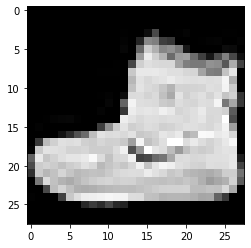

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.grid(False)
plt.show()


The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

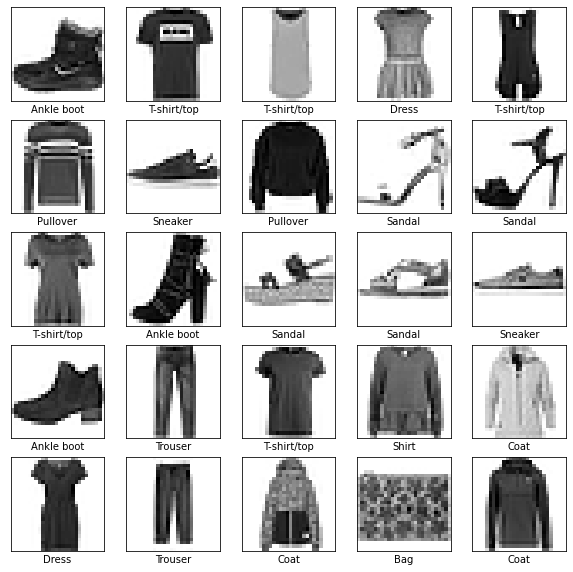

In [ ]:
# Let's print to verify whether the data is of the correct format.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### preprocessing

The image pixel values range from 0 to 255. Let us now normalise the data range from 0 - 255 to 0 - 1 in both the Train and Test set. This normalisation of pixels helps us by optimizing the process where the gradients are computed.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### define model

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#### compile model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4980 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3360 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3109 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.8917


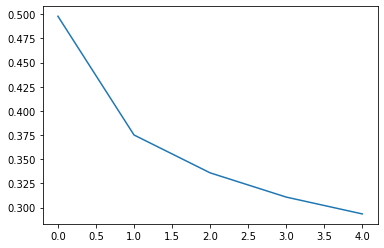

In [ ]:
plt.plot(hist.history['loss'])

#### Evaluate accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images ,  test_labels, verbose=2)

313/313 - 1s - loss: 0.3663 - accuracy: 0.8654 - 1s/epoch - 3ms/step


In [ ]:
# Making predictions from the test_images

predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h)
test_images = test_images.reshape(test_images.shape[0], w, h)


# Helper functions to plot images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

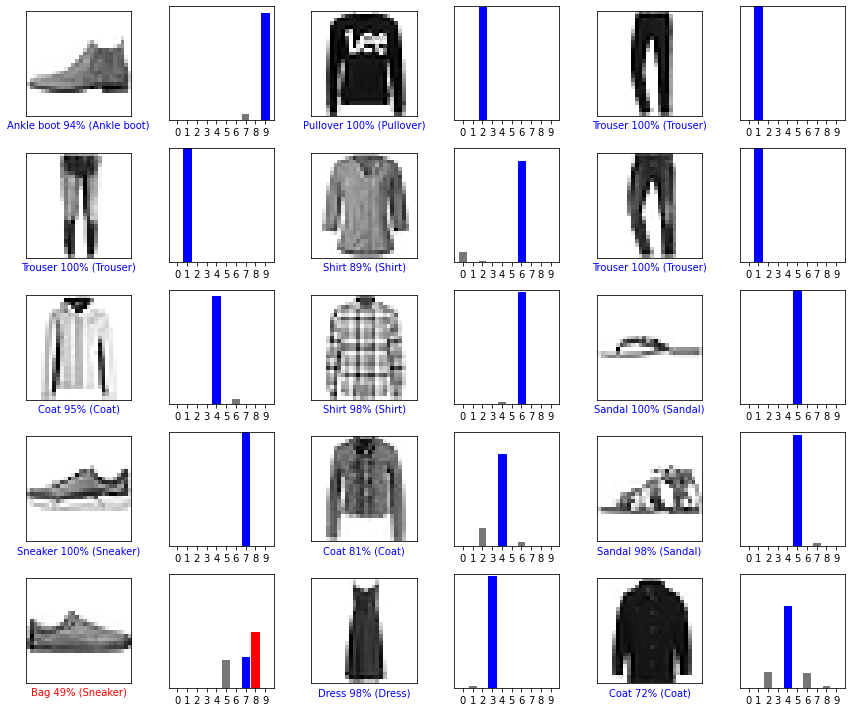

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Implementing Image Classification using CNNs

In [ ]:
# Import Necessary Libraries

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Let's Import the Dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print array size of training dataset
print("Size of Training Images: " + str(train_images.shape))
# Print array size of labels
print("Size of Training Labels: " + str(train_labels.shape))

# Print array size of test dataset
print("Size of Test Images: " + str(test_images.shape))
# Print array size of labels
print("Size of Test Labels: " + str(test_labels.shape))

# Let's see how our outputs look
print("Training Set Labels: " + str(train_labels))
# Data in the test dataset
print("Test Set Labels: " + str(test_labels))

train_images = train_images / 255.0
test_images = test_images / 255.0

Size of Training Images: (60000, 28, 28)
Size of Training Labels: (60000,)
Size of Test Images: (10000, 28, 28)
Size of Test Labels: (10000,)
Training Set Labels: [9 0 0 ... 3 0 5]
Test Set Labels: [9 2 1 ... 8 1 5]


#### preprocessnig

You may have noticed by now that the training set is of shape `(60000,28,28)`.

In convolutional neural networks, we need to feed the data in the form of a 4D Array as follows:

`(num_images, x-dims, y-dims, num_channels_per_image)`

So, as our image is grayscale, we will reshape it to `(60000,28,28,1)` before passing it to our neural network architecture.

In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

## Defining Convolution Layers


Let us see how to define convolution, max pooling, and dropout layers.

### Convolution Layer
We will be using the following API to define the Convolution Layer.

`tf.keras.layers.Conv2D(filters, kernel_size, padding='valid', activation=None, input_shape)`

Let us briefly define the parameters:

 - <B>filters</B>: The dimensionality of the output space (i.e. the number of output filters in the convolution).
 - <B>kernel_size</B>: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
 - <B>padding</B>: One of "valid" or "same" (case-insensitive).
 - <B>activation</B>: Activation function to use (see activations). If you don't specify anything, no activation is applied (i.e. "linear" activation: a(x) = x).

Documentation: [Convolutional Layers](https://keras.io/layers/convolutional/)

### Pooling Layer
`tf.keras.layers.MaxPooling2D(pool_size=2)`

 - <B>pool_size</B>: Size of the max pooling window.
Documentation: [Pooling Layers](https://keras.io/layers/pooling/)

### Dropout
Dropout is an approach to regularization in neural networks which helps reduce interdependent learning amongst the neurons.

Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase, with a certain set of neurons chosen at random. By “ignoring," we mean these units are not considered during a particular forward or backward pass.

It is defined by the following function:

`tf.keras.layers.Dropout(0.3)`

 - Parameter: Fraction of the input units to drop (float between 0 and 1).
Documentation: [Dropout](https://keras.io/layers/core/#dropout)

## define the model

Now that we are aware of the code for building a CNN, let us now build a five layer model:

- Input layer: (28, 28, 1)
  - Size of the input image
- Convolution layers:
  - First layer: Kernel size (3 x 3), resulting in 32 channels.
   - Pooling of size (2 x 2) makes the layer (14 x 14 x 64)
  - Second layer: Kernel size (3 x 3), resulting in 64 channels.
   - Pooling of size (2 x 2) makes the layer (7 x 7 x 32)
- Fully connected layers:
  - Flatten the convolution layers to 1567 nodes = (7 * 7 * 32)
  - Dense layer of size 256
- Output layer:
  - Dense layer with 10 classes using softmax activation

  ![](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/58e1329572bebc508ba7489a9f9415d7e0592ab8/hpc_ai/ai_science_cfd/English/python/jupyter_notebook/Intro_to_DL/images/our_cnn.png)

Now we can define our model in Keras.

In [ ]:
from tensorflow.keras import backend as K
import tensorflow as tf
K.clear_session()
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Dropout(0.3))
# Second convolution layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
# Fully connected layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

#### compile the model


Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

 - <B>Loss function</B> —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction. See KERAS's [loss functions](https://keras.io/api/losses/) section
 - <B>Optimizer</B> —This is how the model is updated based on the data it sees and its loss function. See Keras [Optimizer](https://keras.io/api/optimizers/) Section
 - <B>Metrics</B> —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified. See Keras's [Metrics](https://keras.io/api/metrics/) section

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### train the model

Training the neural network model requires the following steps:

 1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
 2. The model learns to associate images and labels.
 3. You ask the model to make predictions about a test set—in this example, the  test_images array. Verify that the predictions match the labels from the test_labels array.
 
To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [ ]:
hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.5798 - accuracy: 0.7897 - val_loss: 0.3788 - val_accuracy: 0.8579
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3805 - accuracy: 0.8646 - val_loss: 0.3150 - val_accuracy: 0.8858
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3304 - accuracy: 0.8809 - val_loss: 0.2889 - val_accuracy: 0.8924
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2984 - accuracy: 0.8921 - val_loss: 0.2786 - val_accuracy: 0.8961
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2747 - accuracy: 0.9001 - val_loss: 0.2613 - val_accuracy: 0.9050
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2586 - accuracy: 0.9044 - val_loss: 0.2503 - val_accuracy: 0.9090
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2483 - accuracy: 0.9097 - val_loss: 0.2395 - val_accuracy: 0.9123
Epoch 

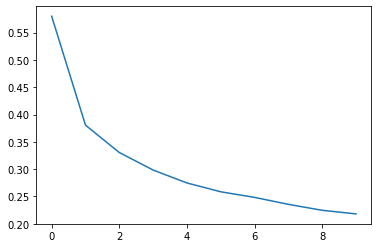

In [ ]:
plt.plot(hist.history['loss'])

In [ ]:
# Evaluating the model using the test set

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2300 - accuracy: 0.9173 - 718ms/epoch - 2ms/step

Test accuracy: 0.9172999858856201


## Making Predictions

In [ ]:
# Making predictions from the test_images

predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h)
test_images = test_images.reshape(test_images.shape[0], w, h)


# Helper functions to plot images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

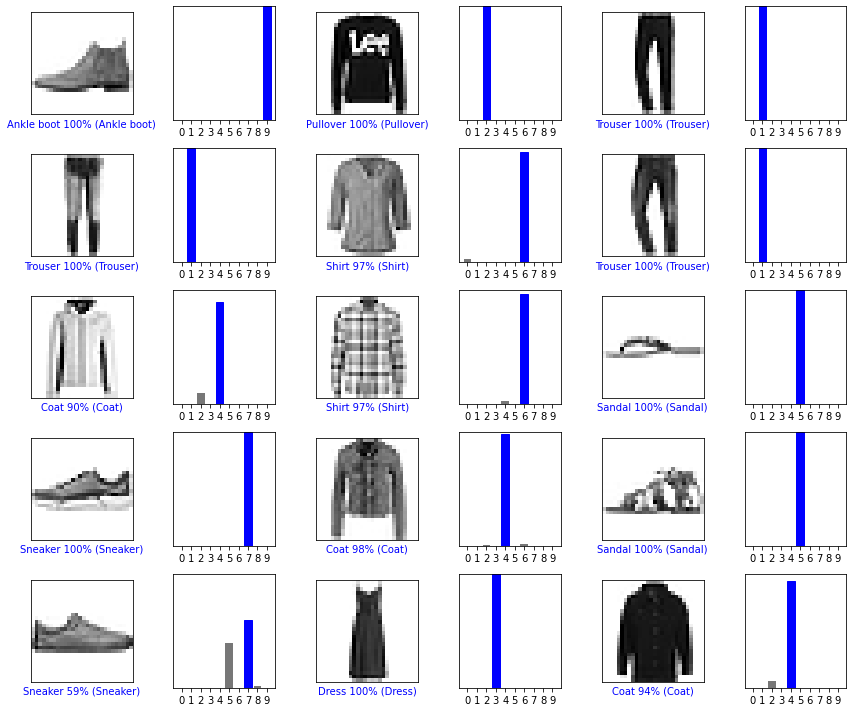

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Conclusion
Running both our models for five epochs, check the result and comparing them (your results may be slightly different):

# resnet



Residual Networks
We discovered that learning in a convolutional neural network is hierarchical: each increase in the number of layers results in more complex features being learned by the layers. But despite this, it is shown empirically that there is a maximum threshold for depth with a traditional CNN model.

In a paper titled Deep Residual Learning for Image Recognition researchers from Microsoft pointed out the following:
![](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/58e1329572bebc508ba7489a9f9415d7e0592ab8/hpc_ai/ai_science_cfd/English/python/jupyter_notebook/Intro_to_DL/images/resnet.PNG)

The failure of the 56-layer CNN could be blamed on the optimization function, initialization of the network, or the famous vanishing/exploding gradient problem. Vanishing gradients are exceptionally easy to blame for this.

So what is the vanishing gradient problem? When we do backpropagation, the gradients tend to get smaller and smaller as we keep on moving backwards in the network. This means that the neurons in the earlier layers learn very slowly as compared to the neurons in the later layers in the hierarchy. The earlier layers in the network are slowest to train.

Earlier layers in the network are essential because they are responsible for learning and detecting the simple patterns and are actually the building blocks of our network. If they give improper and inaccurate results, we can't expect the next layers and the complete network to perform nicely and produce accurate results.

The problem of training very deep networks has been alleviated with the introduction of a new neural network layer — the residual block.

Optional - The Degradation Problem

The degradation problem suggests that solvers might have difficulties in approximating identity mappings by multiple nonlinear layers without the residual learning reformulation.

Let us consider network A having  layers and network B having  layers. Supposing that , if network A performs poorly relative to network B, one might argue that if network A had mapped an identity function for the first  layers, then it would have performed on par with network B. But it doesn't do that due to the vanishing gradient problem, so when we use residual networks, the network gets the input along with learning on the residual, and if the input function was appropriate, it could quickly change the weights of the residual function to be zero.



## Residual Blocks
In a residual block the activation of a layer is fast-forwarded to a deeper layer in the neural network. Residual blocks help in the flow of information from the initial layers to the final layers. This is done by the introduction of skip connections, as seen in the image below.

Let us consider $H(x)$  as an underlying mapping to be fit by a few stacked layers (not necessarily the entire net), with  denoting the inputs to the first of these layers. If one hypothesizes that multiple nonlinear layers can asymptotically approximate complicated functions, then it is equivalent to hypothesize that they can asymptotically approximate the residual functions, i.e.,  (assuming that the input and output are of the same dimensions).

So rather than expecting the stacked layers to approximate $H(x)$, we explicitly let these layers approximate a residual function.

$F(x) = H(x) − x$.

The original function thus becomes $F(x)+x$ .

Although both models should be able to approximate the desired functions asymptotically, the ease of learning might be different. This reformulation is motivated by the counterintuitive phenomena about the degradation problem. As we discussed above, if the added layers can be constructed as identity mappings, a deeper model should have training error no greater than its shallow counterpart.
![](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/58e1329572bebc508ba7489a9f9415d7e0592ab8/hpc_ai/ai_science_cfd/English/python/jupyter_notebook/Intro_to_DL/images/resblock.PNG)

With this, increasing the number of layers improves accuracy. Here are some results from the paper:
![](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/58e1329572bebc508ba7489a9f9415d7e0592ab8/hpc_ai/ai_science_cfd/English/python/jupyter_notebook/Intro_to_DL/images/stats.png)

Now let us see how to write a residual block in Keras.

In [ ]:
# Import Necessary Libraries

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [ ]:
# Let's Import the Dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
# Defining class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Printing the Size of our Dataset

# Print array size of training dataset
print("Size of Training Images: " + str(train_images.shape))
# Print array size of labels
print("Size of Training Labels: " + str(train_labels.shape))

# Print array size of test dataset
print("Size of Test Images: " + str(test_images.shape))
# Print array size of labels
print("Size of Test Labels: " + str(test_labels.shape))

# Let's see how our outputs look
print("Training Set Labels: " + str(train_labels))
# Data in the test dataset
print("Test Set Labels: " + str(test_labels))

Size of Training Images: (60000, 28, 28)
Size of Training Labels: (60000,)
Size of Test Images: (10000, 28, 28)
Size of Test Labels: (10000,)
Training Set Labels: [9 0 0 ... 3 0 5]
Test Set Labels: [9 2 1 ... 8 1 5]


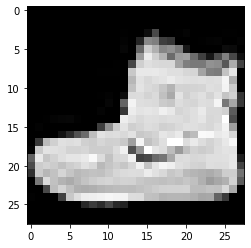

In [ ]:
# Data Preprocessing 

plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

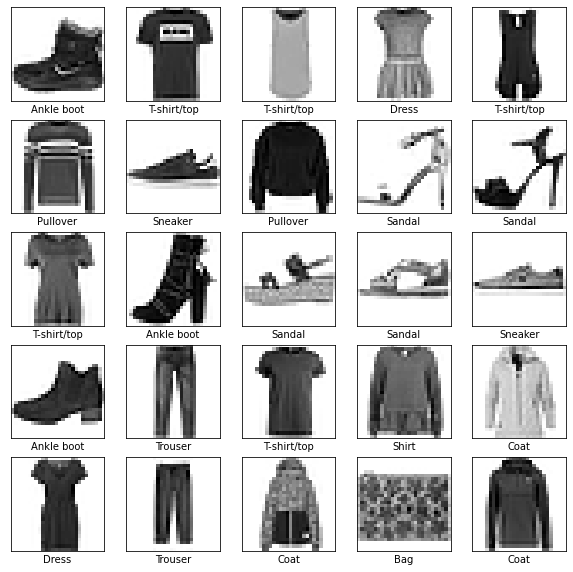

In [ ]:
# Let's print to verify whether the data is of the correct format.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

# Model
Let's build a resnet model with Keras and train it.

We will be using two kinds of residual blocks:

 - Identity Block
 - Convolution Block

 ## Identity Block
In the identity block we have a skip connection with no change in input, paired with a standard set of convolutional layers.

![](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/58e1329572bebc508ba7489a9f9415d7e0592ab8/hpc_ai/ai_science_cfd/English/python/jupyter_notebook/Intro_to_DL/images/identity.png)

## Convolution Block
The convolution block is very similar to the identity block, but there is a convolutional layer in the skip-connection path just to change the dimension such that the dimension of the input and output matches.
![](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/58e1329572bebc508ba7489a9f9415d7e0592ab8/hpc_ai/ai_science_cfd/English/python/jupyter_notebook/Intro_to_DL/images/conv.png)

Let's start building the identity block:

In [ ]:
def identity_block(X, f, filters, stage, block):
    
    # Defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve filters
    F1, F2, F3 = filters
    
    # A path is a block of conv followed by batch normalization and activation
    # Save the input value
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

Convolution Block
Notice the only change we need to do is add a convolution and batch normalisation for the input data to match the output dimension.

This can be done by adding the following lines :


```
##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)
```    

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):

    # Defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet(input_shape = (28, 28, 1), classes = 10):

    # Define the input as a tensor with shape input_shape
    X_input = Input(shape=input_shape)


    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (3, 3), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # AVGPOOL
    X = AveragePooling2D(pool_size=(2,2), padding='same')(X)

    # Output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)


    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet')

    return model

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()
model = ResNet(input_shape = (28, 28, 1), classes = 10)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 14s 24ms/step - loss: 0.4748 - accuracy: 0.8346 - val_loss: 1.1568 - val_accuracy: 0.6519
Epoch 2/10
469/469 [==============================] - 10s 22ms/step - loss: 0.2808 - accuracy: 0.8961 - val_loss: 0.3558 - val_accuracy: 0.8777
Epoch 3/10
469/469 [==============================] - 10s 22ms/step - loss: 0.2409 - accuracy: 0.9116 - val_loss: 0.3963 - val_accuracy: 0.8649
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2087 - accuracy: 0.9230 - val_loss: 0.3345 - val_accuracy: 0.8832
Epoch 5/10
469/469 [==============================] - 11s 23ms/step - loss: 0.1802 - accuracy: 0.9321 - val_loss: 0.2952 - val_accuracy: 0.9015
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.1609 - accuracy: 0.9399 - val_loss: 0.2810 - val_accuracy: 0.9076
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.1424 - accuracy: 0.9471 - val_loss: 0.2867 - val_accuracy:

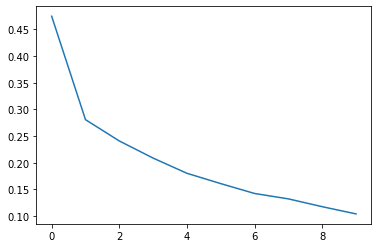

In [ ]:
plt.plot(hist.history['loss'])

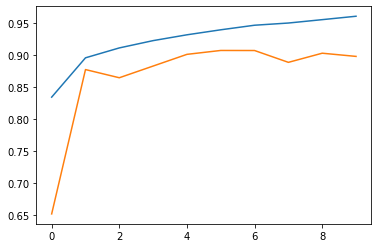

In [ ]:
plt.plot(hist.history['accuracy' ])
plt.plot(hist.history[ 'val_accuracy'])
plt.show()

## Making Predictions

In [ ]:
# Making predictions from the test_images

predictions = model.predict(test_images)

313/313 [==============================] - 2s 4ms/step


In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h)
test_images = test_images.reshape(test_images.shape[0], w, h)

# Helper functions to plot images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

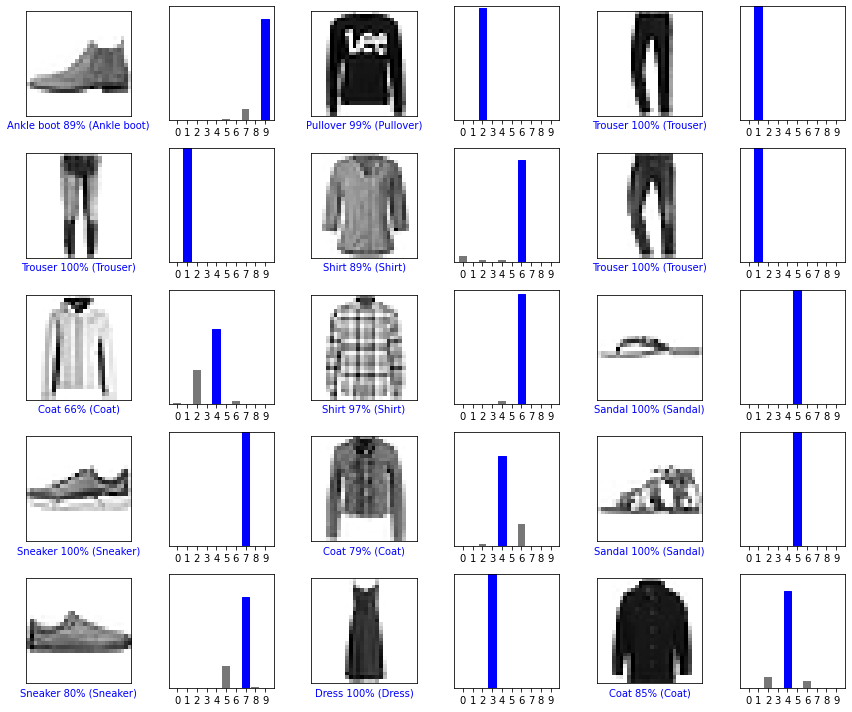

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Conclusion

Running all of our models for five epochs, and check the result and compare them

In [ ]:
# Let's Import the Dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Defining class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Printing the Size of our Dataset

# Print array size of training dataset
print("Size of Training Images: " + str(train_images.shape))
# Print array size of labels
print("Size of Training Labels: " + str(train_labels.shape))

# Print array size of test dataset
print("Size of Test Images: " + str(test_images.shape))
# Print array size of labels
print("Size of Test Labels: " + str(test_labels.shape))

# Let's see how our outputs look
print("Training Set Labels: " + str(train_labels))
# Data in the test dataset
print("Test Set Labels: " + str(test_labels))

Size of Training Images: (60000, 28, 28)
Size of Training Labels: (60000,)
Size of Test Images: (10000, 28, 28)
Size of Test Labels: (10000,)
Training Set Labels: [9 0 0 ... 3 0 5]
Test Set Labels: [9 2 1 ... 8 1 5]


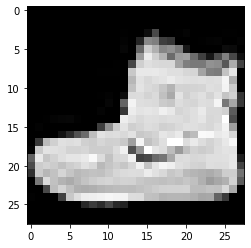

In [ ]:
# Data Preprocessing 

plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

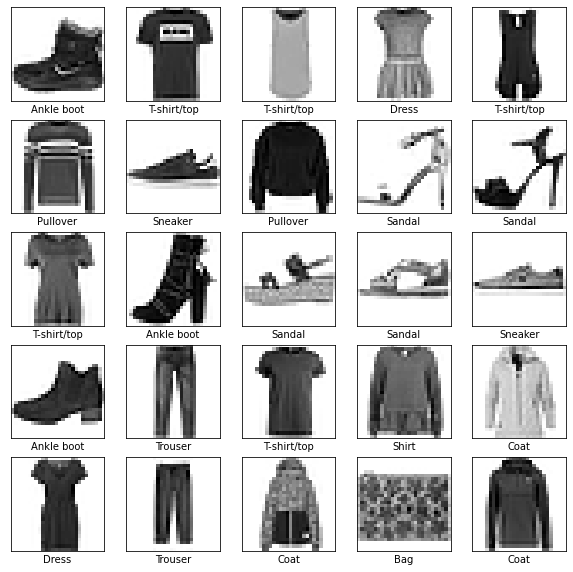

In [ ]:
# Let's print to verify whether the data is of the correct format.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

# MLP-mixer

replace MHA(multi head attention) layer and FF(Feed forward) layer with MLP

![](https://production-media.paperswithcode.com/methods/Screen_Shot_2021-07-20_at_12.09.16_PM_aLnxO7E.png)

see keras implementation for [MLP-mixer](https://github.com/Benjamin-Etheredge/mlp-mixer-keras/blob/main/mlp_mixer_keras/mlp_mixer.py)

## MLP block

it have two dense layer with bottleneck design

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import (
    Add,
    Dense,
    Conv2D,
    GlobalAveragePooling1D,
    Layer,
    LayerNormalization,
    Permute,
    Softmax,
    Activation,
)


class MlpBlock(Layer):
    def __init__(
        self,
        dim: int,
        hidden_dim: int,
        activation=None,
        **kwargs
    ):
        super(MlpBlock, self).__init__(**kwargs)

        if activation is None:
            activation = keras.activations.gelu

        self.dim = dim
        self.hidden_dim = dim
        self.dense1 = Dense(hidden_dim)
        self.activation = Activation(activation)
        self.dense2 = Dense(dim)

    def call(self, inputs):
        x = inputs
        x = self.dense1(x)
        x = self.activation(x)
        x = self.dense2(x)
        return x

    def compute_output_shape(self, input_signature):
        return (input_signature[0], self.dim)

    def get_config(self):
        config = super(MlpBlock, self).get_config()
        config.update({
            'dim': self.dim,
            'hidden_dim': self.hidden_dim
        })
        return config



### mixer block

it also include transpose and skip connection ( pre/post norm option)

In [ ]:


class MixerBlock(Layer):
    def __init__(
        self,
        num_patches: int,
        channel_dim: int,
        token_mixer_hidden_dim: int,
        channel_mixer_hidden_dim: int = None,
        activation=None,
        **kwargs
    ):
        super(MixerBlock, self).__init__(**kwargs)

        self.num_patches = num_patches
        self.channel_dim = channel_dim
        self.token_mixer_hidden_dim = token_mixer_hidden_dim
        self.channel_mixer_hidden_dim = channel_mixer_hidden_dim
        self.activation = activation

        if activation is None:
            self.activation = keras.activations.gelu

        if channel_mixer_hidden_dim is None:
            channel_mixer_hidden_dim = token_mixer_hidden_dim

        self.norm1 = LayerNormalization(axis=1)
        self.permute1 = Permute((2, 1))
        self.token_mixer = MlpBlock(num_patches, token_mixer_hidden_dim, name='token_mixer')

        self.permute2 = Permute((2, 1))
        self.norm2 = LayerNormalization(axis=1)
        self.channel_mixer = MlpBlock(channel_dim, channel_mixer_hidden_dim, name='channel_mixer')

        self.skip_connection1 = Add()
        self.skip_connection2 = Add()

    def call(self, inputs):
        x = inputs
        skip_x = x
        x = self.norm1(x)
        x = self.permute1(x)
        x = self.token_mixer(x)

        x = self.permute2(x)

        x = self.skip_connection1([x, skip_x])
        skip_x = x

        x = self.norm2(x)
        x = self.channel_mixer(x)

        x = self.skip_connection2([x, skip_x])  # TODO need 2?

        return x

    def compute_output_shape(self, input_shape):
        return input_shape

    def get_config(self):
        config = super(MixerBlock, self).get_config()
        config.update({
            'num_patches': self.num_patches,
            'channel_dim': self.channel_dim,
            'token_mixer_hidden_dim': self.token_mixer_hidden_dim,
            'channel_mixer_hidden_dim': self.channel_mixer_hidden_dim,
            'activation': self.activation,
        })
        return config

## MLP-Mixer
original MLP-Mixer use input as patched image.

In [ ]:

def MlpMixerModel(
        input_shape: int,
        num_classes: int,
        num_blocks: int,
        patch_size: int,
        hidden_dim: int,
        tokens_mlp_dim: int,
        channels_mlp_dim: int = None,
        use_softmax: bool = False,
):
    height, width, _ = input_shape

    if channels_mlp_dim is None:
        channels_mlp_dim = tokens_mlp_dim

    num_patches = (height*width)//(patch_size**2)  # TODO verify how this behaves with same padding

    inputs = keras.Input(input_shape)
    x = inputs

    x = Conv2D(hidden_dim,
               kernel_size=patch_size,
               strides=patch_size,
               padding='same',
               name='projector')(x)

    x = keras.layers.Reshape([-1, hidden_dim])(x)

    for _ in range(num_blocks):
        x = MixerBlock(num_patches=num_patches,
                       channel_dim=hidden_dim,
                       token_mixer_hidden_dim=tokens_mlp_dim,
                       channel_mixer_hidden_dim=channels_mlp_dim)(x)

    x = GlobalAveragePooling1D()(x)  # TODO verify this global average pool is correct choice here

    x = LayerNormalization(name='pre_head_layer_norm')(x)
    x = Dense(num_classes, name='head')(x)

    if use_softmax:
        x = Softmax()(x)
    return keras.Model(inputs, x)

In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

In [ ]:
model_mlp_mixer = MlpMixerModel(input_shape=train_images.shape[1:],
                      num_classes=len(np.unique(train_labels)), 
                      num_blocks=4, 
                      patch_size=4,
                      hidden_dim=64, 
                      tokens_mlp_dim=128,
                      channels_mlp_dim=128,
                      use_softmax=True)


In [ ]:
model_mlp_mixer.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model_mlp_mixer.fit(train_images, train_labels, validation_data=(test_images, test_labels),  epochs = 10, batch_size = 128 )

Epoch 1/10
469/469 [==============================] - 23s 38ms/step - loss: 0.5008 - accuracy: 0.8233 - val_loss: 0.4076 - val_accuracy: 0.8536
Epoch 2/10
469/469 [==============================] - 10s 22ms/step - loss: 0.3407 - accuracy: 0.8766 - val_loss: 0.3615 - val_accuracy: 0.8679
Epoch 3/10
469/469 [==============================] - 10s 22ms/step - loss: 0.3025 - accuracy: 0.8891 - val_loss: 0.3576 - val_accuracy: 0.8711
Epoch 4/10
469/469 [==============================] - 10s 22ms/step - loss: 0.2737 - accuracy: 0.8989 - val_loss: 0.3792 - val_accuracy: 0.8576
Epoch 5/10
469/469 [==============================] - 10s 22ms/step - loss: 0.2531 - accuracy: 0.9054 - val_loss: 0.3408 - val_accuracy: 0.8789
Epoch 6/10
469/469 [==============================] - 10s 22ms/step - loss: 0.2324 - accuracy: 0.9130 - val_loss: 0.3397 - val_accuracy: 0.8788
Epoch 7/10
469/469 [==============================] - 10s 22ms/step - loss: 0.2109 - accuracy: 0.9214 - val_loss: 0.3694 - val_accuracy:

In [ ]:
plt.plot(hist.history['accuracy', 'val_accuracy']) 

## additional 

keras also provide pre-defined and pre-trained model.


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255


x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 32, 32, 3) (60000,) (10000, 32, 32, 3) (10000,)


In [ ]:
from tensorflow.keras.applications import ResNet50V2 as resnet_keras

In [ ]:
model_resnet = resnet_keras( weights = 'imagenet', include_top=False, input_shape=(32,32,3))

94668760/94668760 [==============================] - 5s 0us/step


In [ ]:
model_resnet.summary()

In [ ]:
model_resnet.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model_resnet.fit(x_train, y_train, batch_size = 64, epochs=5,verbose=1 )

Epoch 1/5
938/938 [==============================] - 50s 45ms/step - loss: 7.8633 - accuracy: 0.0948
Epoch 2/5
938/938 [==============================] - 40s 43ms/step - loss: 7.6500 - accuracy: 0.0967
Epoch 3/5
938/938 [==============================] - 40s 42ms/step - loss: 7.7498 - accuracy: 0.0966
Epoch 4/5
938/938 [==============================] - 39s 41ms/step - loss: 7.8044 - accuracy: 0.0968
Epoch 5/5
938/938 [==============================] - 38s 41ms/step - loss: 7.8351 - accuracy: 0.0966


In [ ]:
model_resnet.evaluate(x_test, y_test)


313/313 [==============================] - 5s 13ms/step - loss: 7.6839 - accuracy: 0.0976


[7.683920383453369, 0.0975843146443367]

the end of jupyter

<img src="https://www.nvidia.com/content/dam/en-zz/Solutions/about-nvidia/logo-and-brand/01-nvidia-logo-horiz-500x200-2c50-d@2x.png" width=300>